# Finland Public Holidays and Weekend Insights

## 0. Introduction
This notebook is aimed at analyzing public holidays and weekends in Finland between two given years, for example from the year 2000 to 2050. The distribution of holidays will be explored, weekends will be identified, and the data will be visualized to gain insights.

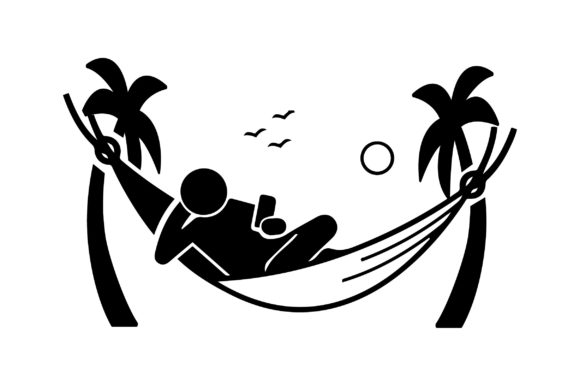


## 1. Setup
Importing the necessary libraries and initializing the holiday data using _holidays_ library. 

The holidays library in Python is a powerful tool for generating and managing public holidays for various countries. It supports a wide range of countries and regions, allowing users to easily access holiday data for their specific needs. The library is particularly useful for applications that require date calculations, such as scheduling, financial analysis, and time series analysis. More information can be found at https://github.com/vacanza/holidays/.

Holidays of Finland are computed in the file https://github.com/vacanza/holidays/blob/dev/holidays/countries/finland.py.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays
from datetime import date, timedelta

## 2. Data Preparation


In [3]:
# Define the range of years for analysis
start_year = 2000
end_year = 2050

# Initialize the holidays library for Finland
fi_holidays = {year: holidays.FI(years=year) for year in range(start_year, end_year + 1)}

### Holiday preview in sample year (2024)

In [4]:
# Preview holidays for a sample year
display(fi_holidays[2024])

{datetime.date(2024, 1, 1): 'Uudenvuodenpäivä', datetime.date(2024, 1, 6): 'Loppiainen', datetime.date(2024, 3, 29): 'Pitkäperjantai', datetime.date(2024, 3, 31): 'Pääsiäispäivä', datetime.date(2024, 4, 1): 'Toinen pääsiäispäivä', datetime.date(2024, 5, 1): 'Vappu', datetime.date(2024, 5, 9): 'Helatorstai', datetime.date(2024, 5, 19): 'Helluntaipäivä', datetime.date(2024, 6, 21): 'Juhannusaatto', datetime.date(2024, 6, 22): 'Juhannuspäivä', datetime.date(2024, 11, 2): 'Pyhäinpäivä', datetime.date(2024, 12, 6): 'Itsenäisyyspäivä', datetime.date(2024, 12, 24): 'Jouluaatto', datetime.date(2024, 12, 25): 'Joulupäivä', datetime.date(2024, 12, 26): 'Tapaninpäivä'}

In [5]:
sample_year = 2024
print(f"Holidays in {sample_year}:")
for holy_date, name in fi_holidays[sample_year].items():
    print(f"{holy_date}: {name}")

Holidays in 2024:
2024-01-01: Uudenvuodenpäivä
2024-01-06: Loppiainen
2024-03-29: Pitkäperjantai
2024-03-31: Pääsiäispäivä
2024-04-01: Toinen pääsiäispäivä
2024-05-01: Vappu
2024-05-09: Helatorstai
2024-05-19: Helluntaipäivä
2024-06-21: Juhannusaatto
2024-06-22: Juhannuspäivä
2024-11-02: Pyhäinpäivä
2024-12-06: Itsenäisyyspäivä
2024-12-24: Jouluaatto
2024-12-25: Joulupäivä
2024-12-26: Tapaninpäivä


### Weekend preparation

In [6]:
# Function to calculate all weekends for a given year
def get_weekends(year):
    weekends = []
    start_date = date(year, 1, 1)
    end_date = date(year, 12, 31)
    current_date = start_date
    while current_date <= end_date:
        if current_date.weekday() in [5, 6]:  # 5 = Saturday, 6 = Sunday
            weekends.append(current_date)
        current_date += timedelta(days=1)
    return weekends

In [7]:
# Generate weekends for all years in the range
weekends = {year: get_weekends(year) for year in range(start_year, end_year + 1)}

In [8]:
# Preview weekends for a sample year
print(f"\nWeekends in {sample_year}:")
print(weekends[sample_year][:10])  # Show first 10 weekends as samples


Weekends in 2024:
[datetime.date(2024, 1, 6), datetime.date(2024, 1, 7), datetime.date(2024, 1, 13), datetime.date(2024, 1, 14), datetime.date(2024, 1, 20), datetime.date(2024, 1, 21), datetime.date(2024, 1, 27), datetime.date(2024, 1, 28), datetime.date(2024, 2, 3), datetime.date(2024, 2, 4)]


## 3. Holidays and Weeknd Analysis

In [9]:
print(weekends[sample_year][-10:])  # Show last 10 weekends as samples
print(fi_holidays[sample_year].keys())

[datetime.date(2024, 11, 30), datetime.date(2024, 12, 1), datetime.date(2024, 12, 7), datetime.date(2024, 12, 8), datetime.date(2024, 12, 14), datetime.date(2024, 12, 15), datetime.date(2024, 12, 21), datetime.date(2024, 12, 22), datetime.date(2024, 12, 28), datetime.date(2024, 12, 29)]
dict_keys([datetime.date(2024, 1, 1), datetime.date(2024, 1, 6), datetime.date(2024, 3, 29), datetime.date(2024, 3, 31), datetime.date(2024, 4, 1), datetime.date(2024, 5, 1), datetime.date(2024, 5, 9), datetime.date(2024, 5, 19), datetime.date(2024, 6, 21), datetime.date(2024, 6, 22), datetime.date(2024, 11, 2), datetime.date(2024, 12, 6), datetime.date(2024, 12, 24), datetime.date(2024, 12, 25), datetime.date(2024, 12, 26)])


In [10]:
# Function to calculate holidays that are not on weekends, i.e. real off days
def calculate_real_off_days(year, holidays_dict, weekends_dict):
    holidays_on_weekends = 0
    for holiday_date in holidays_dict[year].keys():
        if holiday_date in weekends_dict[year]:
            holidays_on_weekends += 1
    total_holidays = len(holidays_dict[year])
    real_off_days = total_holidays - holidays_on_weekends
    return real_off_days

In [11]:
# Generate the number of real off days for each year
real_off_days = {
    year: calculate_real_off_days(year, fi_holidays, weekends)
    for year in range(start_year, end_year + 1)
}

### Samples and previews:

In [12]:
# Preview results for a few sample years
for year in range(2021, 2024 +1):
    print(f"{year}: {real_off_days[year]} real off days")

2021: 8 real off days
2022: 7 real off days
2023: 9 real off days
2024: 10 real off days


In [13]:
sample_year = 2027

print(f"number of holidays in {sample_year}:" , len(fi_holidays[sample_year]))
print(f"number of weekends in {sample_year}:" , len(weekends[sample_year])) 

print(fi_holidays[sample_year])
holidays_on_weekends = 0
for day in fi_holidays[sample_year].keys():
    if day in weekends[sample_year]:
        print("     Weekend", day)
        holidays_on_weekends += 1
    else:
        print("🟩 Weekday", day)
print(f"\nTotal Holidays in {sample_year}: {len(fi_holidays[sample_year])}")
print("Holidays on weekends:", holidays_on_weekends)
print("Real off days:", len(fi_holidays[sample_year]) - holidays_on_weekends)

number of holidays in 2027: 15
number of weekends in 2027: 104
{datetime.date(2027, 1, 1): 'Uudenvuodenpäivä', datetime.date(2027, 1, 6): 'Loppiainen', datetime.date(2027, 3, 26): 'Pitkäperjantai', datetime.date(2027, 3, 28): 'Pääsiäispäivä', datetime.date(2027, 3, 29): 'Toinen pääsiäispäivä', datetime.date(2027, 5, 1): 'Vappu', datetime.date(2027, 5, 6): 'Helatorstai', datetime.date(2027, 5, 16): 'Helluntaipäivä', datetime.date(2027, 6, 25): 'Juhannusaatto', datetime.date(2027, 6, 26): 'Juhannuspäivä', datetime.date(2027, 11, 6): 'Pyhäinpäivä', datetime.date(2027, 12, 6): 'Itsenäisyyspäivä', datetime.date(2027, 12, 24): 'Jouluaatto', datetime.date(2027, 12, 25): 'Joulupäivä', datetime.date(2027, 12, 26): 'Tapaninpäivä'}
🟩 Weekday 2027-01-01
🟩 Weekday 2027-01-06
🟩 Weekday 2027-03-26
     Weekend 2027-03-28
🟩 Weekday 2027-03-29
     Weekend 2027-05-01
🟩 Weekday 2027-05-06
     Weekend 2027-05-16
🟩 Weekday 2027-06-25
     Weekend 2027-06-26
     Weekend 2027-11-06
🟩 Weekday 2027-12-06
🟩 

## 4. Combining Holidays and Weekends

In [14]:
# Function to calculate detailed statistics for each year
def calculate_yearly_statistics(year, holidays_dict, weekends_dict):
    holidays_on_weekends = 0
    for holiday_date in holidays_dict[year].keys():
        if holiday_date in weekends_dict[year]:
            holidays_on_weekends += 1
    
    total_holidays = len(holidays_dict[year])
    real_off_days = total_holidays - holidays_on_weekends
    total_weekends = len(weekends_dict[year])
    total_days_off = total_weekends + real_off_days
    
    return {
        'Year': year,
        'Total Public Holidays': total_holidays,
        'Holidays on Weekends': holidays_on_weekends,
        'Holidays NOT on Weekends': real_off_days,
        'Total Weekends': total_weekends,
        'Total Days Off': total_days_off
    }

# Calculate statistics for all years
yearly_statistics = [
    calculate_yearly_statistics(year, fi_holidays, weekends)
    for year in range(start_year, end_year + 1)
]

# Convert the statistics to a DataFrame
stats_df = pd.DataFrame(yearly_statistics)

stats_df.head(10)

,Year,Total Public Holidays,Holidays on Weekends,Holidays NOT on Weekends,Total Weekends,Total Days Off
0,2000,15,6,9,106,115
1,2001,15,5,10,104,114
2,2002,15,5,10,104,114
3,2003,15,5,10,104,114
4,2004,15,7,8,104,112
5,2005,15,8,7,105,112
6,2006,15,6,9,105,114
7,2007,15,5,10,104,114
8,2008,14,6,8,104,112
9,2009,15,6,9,104,113


## 5. Visualization

### 5-1. Public Holidays NOT on Weekend between 2000 - 2050

In [15]:
# Convert the results into a DataFrame for easier visualization
real_off_days_df = pd.DataFrame.from_dict(
    real_off_days, orient='index', columns=['Real Off Days']
)
real_off_days_df.index.name = 'Year'
real_off_days_df.reset_index(inplace=True)

# Identify the best and worst years
best_year = real_off_days_df.loc[real_off_days_df['Real Off Days'].idxmax()]
worst_year = real_off_days_df.loc[real_off_days_df['Real Off Days'].idxmin()]

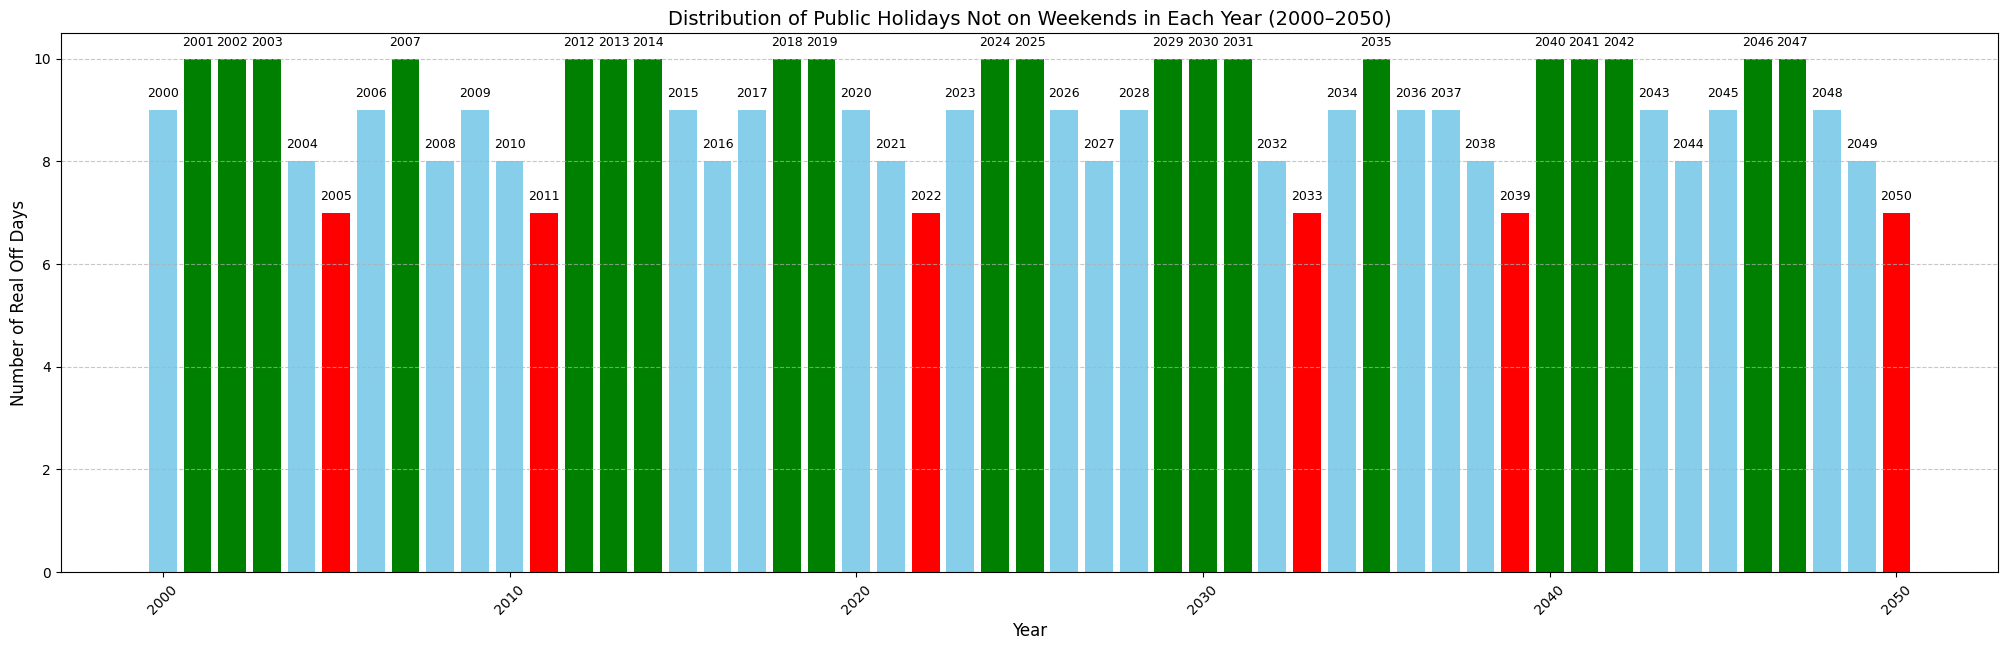

In [16]:
# Identify all best and worst years
max_real_off_days = real_off_days_df['Real Off Days'].max()
min_real_off_days = real_off_days_df['Real Off Days'].min()

best_years = real_off_days_df[real_off_days_df['Real Off Days'] == max_real_off_days]
worst_years = real_off_days_df[real_off_days_df['Real Off Days'] == min_real_off_days]

# Plot the trend of real off days as a bar chart
plt.figure(figsize=(25, 7))
bars = plt.bar(real_off_days_df['Year'], real_off_days_df['Real Off Days'], color='skyblue', label='Real Off Days')

# Highlight all best years
for _, row in best_years.iterrows():
    plt.bar(row['Year'], row['Real Off Days'], color='green', label=f"Best Year ({row['Year']})" if _ == 0 else None)

# Highlight all worst years
for _, row in worst_years.iterrows():
    plt.bar(row['Year'], row['Real Off Days'], color='red', label=f"Worst Year ({row['Year']})" if _ == 0 else None)

# Add the number of real off days as labels above the bars
for bar in bars:
    height = bar.get_height()
    year = int(bar.get_x() + bar.get_width() / 2)  # Use the x-coordinate of the bar for year
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        height + 0.2,  # Slightly above the bar
        f"{year}",  # The label includes both the year and real off days
        ha='center', va='bottom', fontsize=9
    )

# Add labels and title
plt.title('Distribution of Public Holidays Not on Weekends in Each Year (2000–2050)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Real Off Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### 5-2. Total Days off in Each Year Between 2000-2050

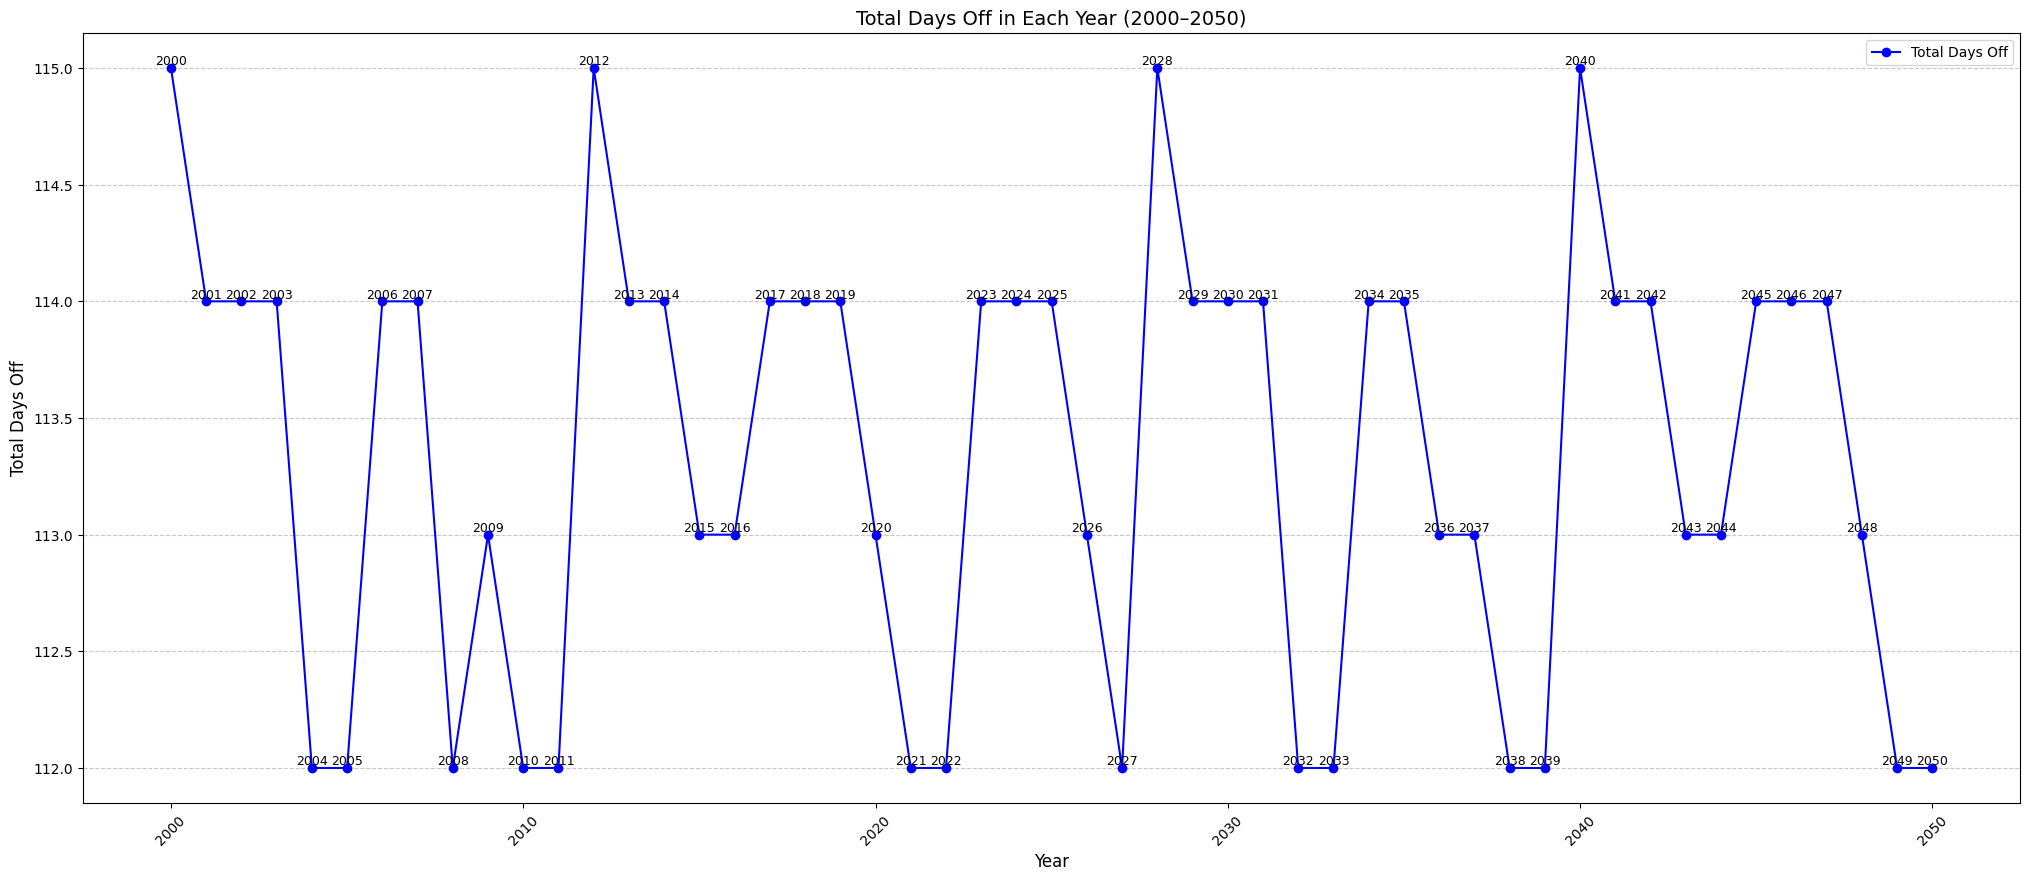

In [20]:
# Plot the total holidays in each year as a line diagram
plt.figure(figsize=(25, 10))
plt.plot(stats_df['Year'], stats_df['Total Days Off'], marker='o', linestyle='-', color='b', label='Total Days Off')

# Add labels and title
plt.title('Total Days Off in Each Year (2000–2050)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Days Off', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Add the number of total days off as labels on the markers
for i, row in stats_df.iterrows():
    plt.text(row['Year'], row['Total Days Off'], row['Year'], ha='center', va='bottom', fontsize=9)

# Show the plot
plt.show()

### 5-3. Distribution of Days Off Throughout Each Year in the 2020s

In [18]:
import seaborn as sns

# Prepare data for the 2020s
years_2020s = range(2020, 2030)

# Aggregate real public holidays for each month in the 2020s
monthly_real_holidays_2020s = pd.DataFrame({
    year: {month: sum(1 for holy_date in fi_holidays[year] if holy_date.month == month and holy_date not in weekends[year]) for month in range(1, 13)}
    for year in years_2020s
}).fillna(0)

# Rearrange the DataFrame to have months as columns and years as rows
monthly_real_holidays_2020s = monthly_real_holidays_2020s.T
monthly_real_holidays_2020s.columns = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

# Add a column for the total number of real holidays in each year
monthly_real_holidays_2020s['Total'] = monthly_real_holidays_2020s.sum(axis=1)

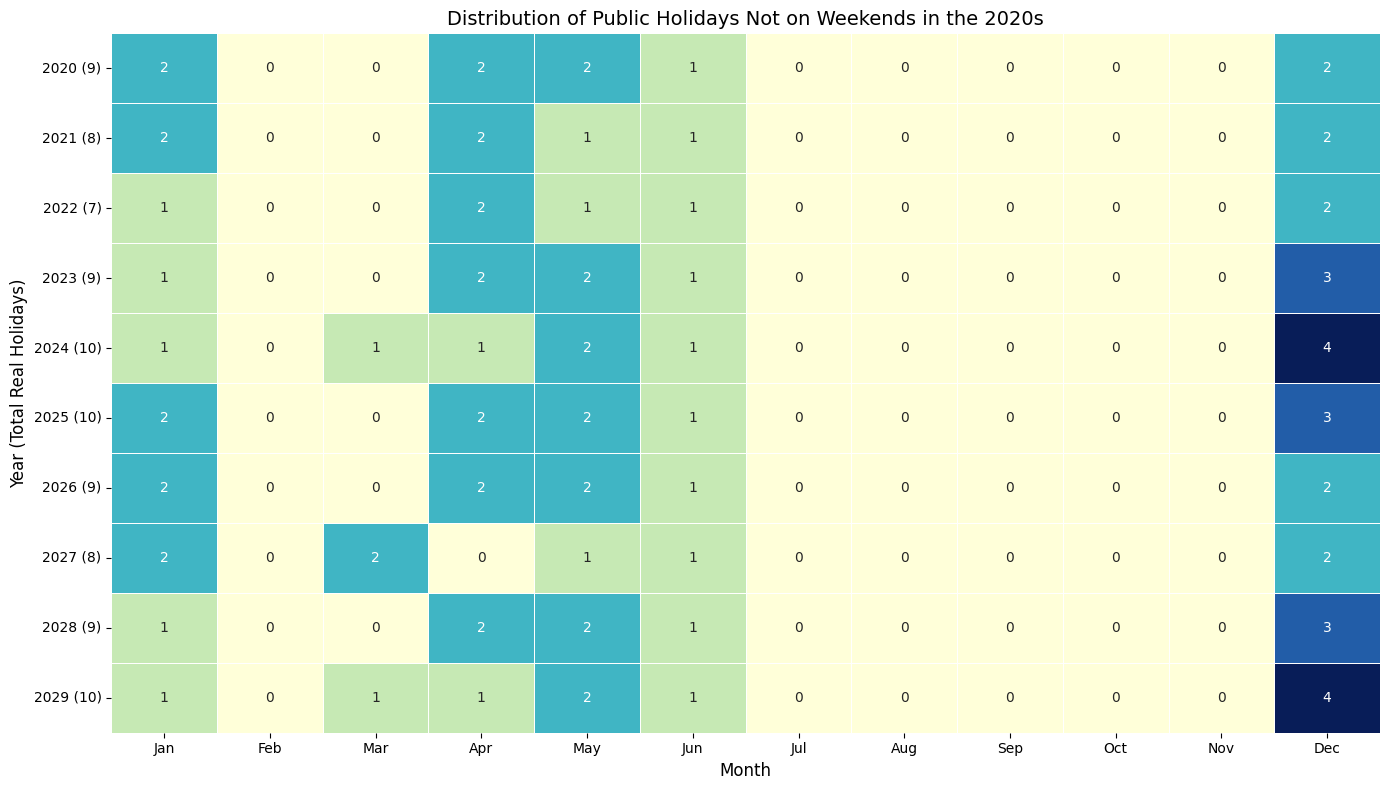

In [19]:
# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    monthly_real_holidays_2020s.iloc[:, :-1],  # Exclude the 'Total' column from heatmap
    annot=True,  # Show actual values in the heatmap
    fmt=".0f",  # Format as integers
    cmap="YlGnBu", 
    cbar=False,
    yticklabels=[f"{year} ({int(total)})" for year, total in zip(years_2020s, monthly_real_holidays_2020s['Total'])],  # Add total to y-axis labels
    linewidths=0.5
)

# Add labels and title
plt.title('Distribution of Public Holidays Not on Weekends in the 2020s', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year (Total Real Holidays)', fontsize=12)

# Adjust xticks to center the month labels
plt.xticks(
    ticks=np.arange(0.5, 12.5),  # Center tick labels by offsetting by 0.5
    labels=monthly_real_holidays_2020s.columns[:-1],  # Month labels
    fontsize=10
)

plt.tight_layout()

# Show the plot
plt.show()
